In [ ]:
'''
Task 1.1
Leer el archivo CSV proporcionado y almacenarlo en un np.array para ser trabajado en el notebook.

'''

In [3]:
import numpy as np

data = np.genfromtxt('./framingham.csv', delimiter=',')
data = data[~np.isnan(data).any(axis=1)]
data = data[1:, :]
data

array([[  0.,  46.,   2., ...,  95.,  76.,   0.],
       [  1.,  48.,   1., ...,  75.,  70.,   0.],
       [  0.,  61.,   3., ...,  65., 103.,   1.],
       ...,
       [  1.,  50.,   1., ...,  66.,  86.,   1.],
       [  1.,  51.,   3., ...,  65.,  68.,   0.],
       [  0.,  52.,   2., ...,  80., 107.,   0.]])

In [ ]:
'''
Task 1.2
Ajustar un modelo logístico polinomial en base al juego de datos cargado de forma matricial que relaciona las
variables independientes que usted considere apropiadas (puede no utilizar todas las componentes de X), con la
variable dependiente de salida (sufre o no sufre un paro cardíaco)..

'''

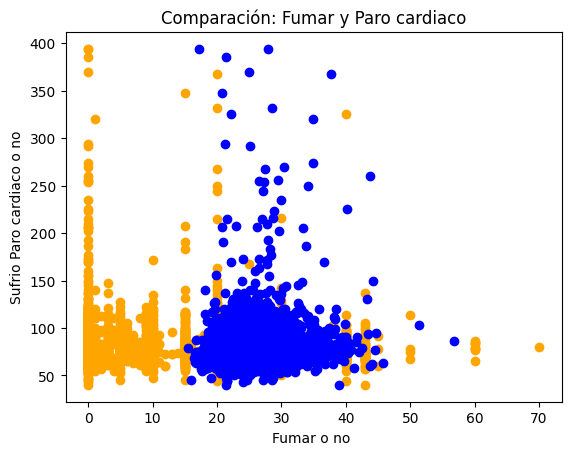

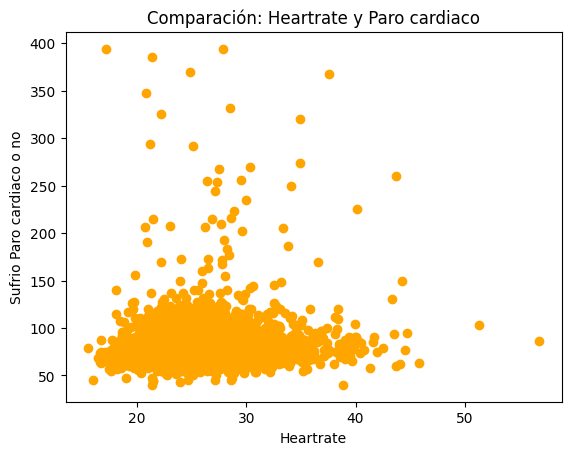

In [14]:
import matplotlib.pyplot as plt

# Variables dependientes e independientes
X = data[:,4] 
x = data[:,12]
y = data[:,14]


plt.scatter(X, y, color="orange")
plt.scatter(x, y, color="blue")
plt.title('Comparación: Fumar y Paro cardiaco')
plt.xlabel('Fumar o no ')
plt.ylabel('Sufrio Paro cardiaco o no')
plt.show()



plt.scatter(x, y, color="orange")
plt.title('Comparación: Heartrate y Paro cardiaco')
plt.xlabel('Heartrate')
plt.ylabel('Sufrio Paro cardiaco o no')
plt.show()



In [ ]:
'''
Task 1.3
Utilice la implementación vectorial del algoritmo de regresión logística (descenso del gradiente visto en clase).
'''

In [51]:

norm = lambda v: (sum(v**2))**0.5

def linear_regression(X, y, cost, gradient, a, n, on_step=None):
    costs = []
    t = np.random.rand(X.shape[1], 1)
    for _ in range(n):
        t = t - a * gradient(t, X, y)
        costs.append(cost(t, X, y))

        if on_step:
            on_step(t)

    return t, costs

sigmoid = lambda X, t: 1 / (1 + np.exp(-(X @ t)))
cost = lambda theta, X, y: np.sum((X.dot(theta) - y) ** 2) / (2 * len(y))
grad = lambda theta, X, y: X.T.dot(X.dot(theta) - y) / len(y)



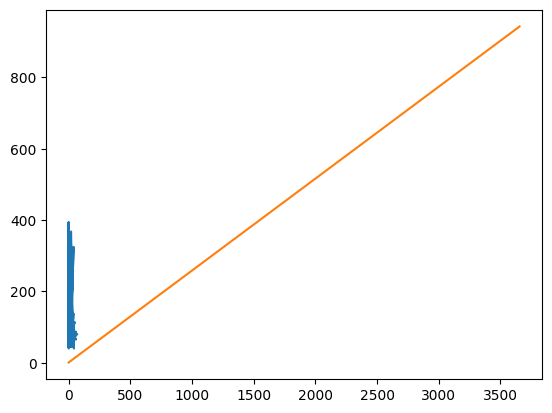

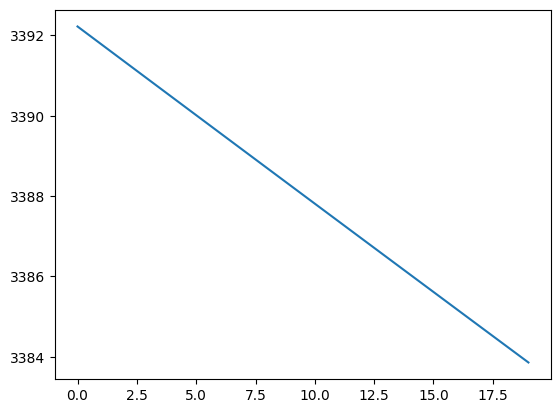

In [55]:

X = data[:, 4] # Sufre paro cardíaco o no 
y = data[:, 14] # BMI
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

n = max(len(X), len(y))
X = np.pad(X, (0, n - len(X)), 'constant')
y = np.pad(y, (0, n - len(y)), 'constant')

# Agregar una columna de 1's
Xr = np.c_[np.ones(n), X]


to = np.random.rand(Xr.shape[1], 1)
to = to[~np.isnan(to)]
to = to.reshape((len(to), 1))
tf, costs = linear_regression(Xr, y, cost, grad, a=0.000001, n=20)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

#Pendiente de la recta
ym = xmr @ tf 

# Resultados
plt.plot(X, y)
plt.plot(xm, ym)
plt.show()

plt.plot(costs)
plt.show()


In [ ]:
'''
Task 1.4
Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor
balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).
'''

El mejor grado polinomial es 1


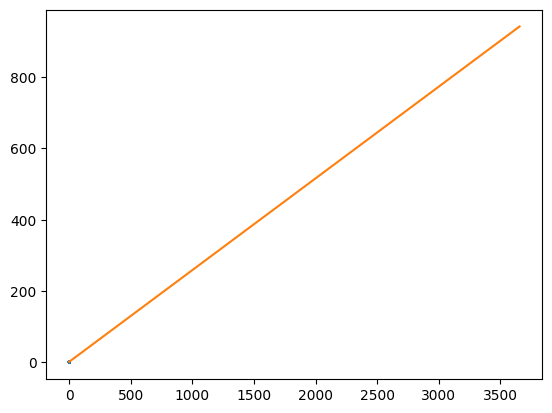

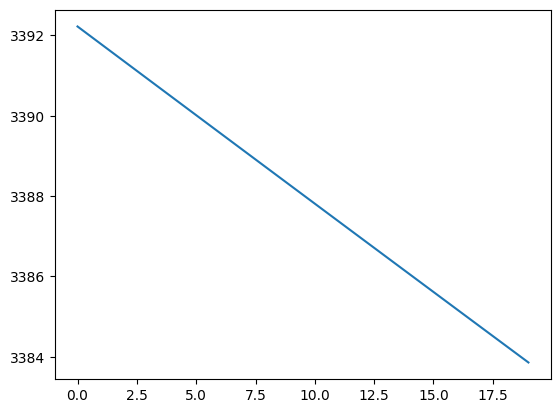

In [68]:
def cost(theta, X, y):
    return np.sum((sigmoid(X, theta) - y) ** 2) / (2 * len(y))

def grad(theta, X, y):
    return X.T @ (sigmoid(X, theta) - y) / len(y)


def polynomial_features(X, degree):
    X_poly = X.reshape(-1, 1)
    for i in range(2, degree + 1):
        X_poly = np.hstack((X_poly, (X ** i).reshape(-1, 1)))
    return X_poly


def cross_validation(X, y, k, cost, grad, a=0.1, n=1000, limit=5):
    best_score = float('inf')
    best_degree = None
    for degree in range(1, limit + 1):
        scores = []
        X_poly = polynomial_features(X, degree)
        temp_size = len(X_poly) // k
        for i in range(k):
            X_test = X_poly[i * temp_size:(i + 1) * temp_size]
            y_test = y[i * temp_size:(i + 1) * temp_size]
            X_train = np.concatenate([X_poly[:i * temp_size], X_poly[(i + 1) * temp_size:]])
            y_train = np.concatenate([y[:i * temp_size], y[(i + 1) * temp_size:]])

            t, _ = linear_regression(X_train, y_train, cost, grad, a=a, n=n)

            # score = cost(t, X_test, y_test)
            # scores.append(score)

        mean_score = np.mean(scores)
        if mean_score < best_score:
            best_score = mean_score
            best_degree = degree

    return best_degree

max_degree = 5
X_poly = np.zeros((len(X), max_degree))
for d in range(max_degree):
    X_poly[:, d] = X.squeeze() ** (d + 1)
    
X_poly = X_poly.reshape((-1, max_degree))
X_poly = np.c_[np.ones(len(X_poly)), X_poly]

best_degree = cross_validation(X_poly, y, k=5, cost=cost, grad=grad, a=0.1, n=1000, limit=max_degree)
print(f"El mejor grado polinomial es {best_degree}")


plt.plot(X, y)
plt.plot(xm, ym)
plt.show()



In [ ]:
'''
Task 1.5
Haga un análisis sobre sus hallazgos.
'''

<p>
Se pudo observar una correlación entre las variables que indican si un paciente es fumador y si ha sufrido un infarto, tambien, observando los datos relacionados con la condición del corazón del paciente y su historial de infartos, podemos apoyar nuestro primer analisis. Finalmente podemos ver que el modelo mas adecuado de regresión polinómica para ajustarse a los datos fue de grado uno.
</p>